In [1]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Q1. Downloading the data



In [44]:
taxi_data_202301 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
taxi_data_202302 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [45]:
len(taxi_data_202301.columns)

19

### Q2. Computing duration

In [46]:
taxi_data_202301['duration'] = taxi_data_202301.tpep_dropoff_datetime - taxi_data_202301.tpep_pickup_datetime
taxi_data_202301['duration'] = taxi_data_202301.duration.dt.total_seconds() / 60

In [47]:
taxi_data_202301.duration.mean()

np.float64(15.668995167330452)

In [48]:
taxi_data_202301.duration.std()

np.float64(42.59435124195458)

### Q3. Dropping outliers

In [49]:
len(taxi_data_202301[(taxi_data_202301.duration >= 1) & (taxi_data_202301.duration <= 60)]) / len(taxi_data_202301) * 100

98.1220282212598

In [50]:
df = taxi_data_202301[(taxi_data_202301.duration >= 1) & (taxi_data_202301.duration <= 60)].copy()

### Q4. One-hot encoding

In [54]:
categorical = ['PULocationID', 'DOLocationID']

In [55]:
df[categorical] = df[categorical].astype(str)

In [56]:
train_dicts = df[categorical].to_dict(orient='records')

In [57]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [58]:
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3009173, 515)


### Q5. Training a model

In [59]:
target = 'duration'
y_train = df[target].values

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f'Train RMSE: {mean_squared_error(y_train, y_pred, squared=False)}')

Train RMSE: 7.649261936284003


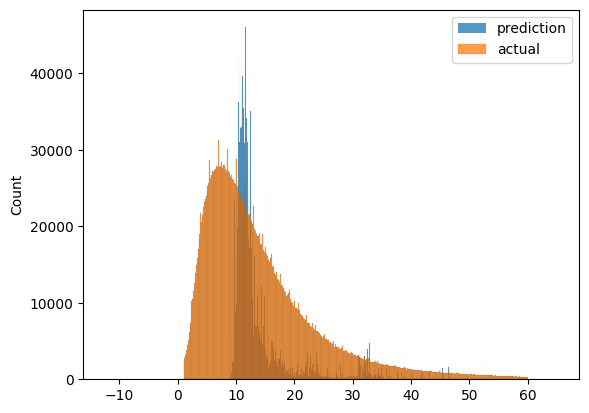

In [61]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend()

### Q6. Evaluating the model

In [62]:
taxi_data_202302['duration'] = taxi_data_202302.tpep_dropoff_datetime - taxi_data_202302.tpep_pickup_datetime
taxi_data_202302['duration'] = taxi_data_202302.duration.dt.total_seconds() / 60

In [63]:
categorical = ['PULocationID', 'DOLocationID']
valid_df = taxi_data_202302[(taxi_data_202302.duration >= 1) & (taxi_data_202302.duration <= 60)].copy()
valid_df[categorical] = valid_df[categorical].astype(str)

In [64]:
val_dicts = valid_df[categorical].to_dict(orient='records')

In [66]:
X_val = dv.transform(val_dicts) 
y_val = valid_df.duration.values

In [67]:
y_pred = lr.predict(X_val)

In [68]:
print(f'Val RMSE: {mean_squared_error(y_val, y_pred, squared=False)}')

Val RMSE: 7.811818654341152
